In [153]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, MWETokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import langcodes
from datetime import date
from dateutil.relativedelta import relativedelta
from langdetect import detect, DetectorFactory
from tqdm import tqdm
from IPython.display import set_matplotlib_formats

# Uncomment on first run
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lkakpo.BEIJAFLORE\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lkakpo.BEIJAFLORE\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lkakpo.BEIJAFLORE\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
# plot themes
sns.set_theme(style="whitegrid")
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks", {"xtick.major.size":8, "ytick.major.size":8})
sns.axes_style("whitegrid")
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline


# Load data into DataFrame (jobs_all)

In [69]:
file = os.path.join('..', '2. Exports', '1. Export scraper', '2023_01_05-10_38-artificial_intelligence.xlsx')
jobs_all = pd.read_excel(file)

jobs_all = jobs_all.drop_duplicates(subset=['Job_ID'])
jobs_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_ID           1984 non-null   int64 
 1   Scrapped link    1984 non-null   object
 2   Job_Title        1984 non-null   object
 3   Company          1984 non-null   object
 4   Location         1984 non-null   object
 5   Posted_date      1984 non-null   object
 6   Job_description  1984 non-null   object
 7   6                1984 non-null   object
 8   7                1984 non-null   object
 9   Contract_type    1984 non-null   object
 10  9                1984 non-null   object
 11  10               1984 non-null   object
 12  Recruter         1983 non-null   object
dtypes: int64(1), object(12)
memory usage: 217.0+ KB


In [70]:
# jobs_all.drop(["6", "7", "9", "10"], axis = 1, inplace=True)

"""to_delete = ["6", "7", "9", "10"]
jobs_clean = jobs_all.drop(to_delete, axis = 1)"""

jobs_clean = jobs_all.drop(jobs_all.columns[[7, 8, 10, 11]], axis = 1)
jobs_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 1983
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job_ID           1984 non-null   int64 
 1   Scrapped link    1984 non-null   object
 2   Job_Title        1984 non-null   object
 3   Company          1984 non-null   object
 4   Location         1984 non-null   object
 5   Posted_date      1984 non-null   object
 6   Job_description  1984 non-null   object
 7   Contract_type    1984 non-null   object
 8   Recruter         1983 non-null   object
dtypes: int64(1), object(8)
memory usage: 155.0+ KB


In [71]:
# all jobs title
jobs_clean.Job_Title.value_counts().head(20)

SAP Data Analytics Consultant                                                                        253
Expert chargé de l'assainissement et de la gestion à long terme des déchets radioactifs radifères    251
R&D Application Engineer                                                                             246
System Engineer Data Center                                                                          245
Senior Data Engineer                                                                                   9
Java Developer                                                                                         7
Business Analyst                                                                                       6
Data Engineer - 4500€ - Ghent/Antwerp - 3/remote                                                       6
DevOps Engineer                                                                                        5
Machine Learning Engineer                              

In [72]:
jobs_clean.head()

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,About the job\n\nLove sports?\n\n\n\n\nWe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,About the job\n\niOS Developer\n\nWant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,About the job\n\nLooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen
3,3,https://www.linkedin.com/jobs/view/3419017351/...,Procesingenieur,Atlas Copco,"Willebroek, Flemish Region, Belgium",1 day ago,About the job\nPassionate people create except...,"Full-time |_/- 10,001+ employees · Machinery M...",-
4,4,https://www.linkedin.com/jobs/view/3419682078/...,(Junior) Solution Architect,Vinçotte,"Vilvoorde, Flemish Region, Belgium",23 hours ago,About the job\n\nBedrijfsomschrijving\n\n\n\n\...,"Full-time · Mid-Senior level |_/- 1,001-5,000 ...",-


In [73]:
jobs_clean_unique = jobs_clean.drop_duplicates(
  subset = ['Job_Title', 'Company'],
  keep = 'last').reset_index(drop = True)
  
# print latest dataframe
# display(jobs_clean_unique)

# all jobs title
jobs_clean_unique.Job_Title.value_counts()

Senior Data Engineer                                             7
Java Developer                                                   6
Business Analyst                                                 6
Machine Learning Engineer                                        5
Data Scientist                                                   5
                                                                ..
Software (Python) Developer                                      1
Stageopdracht: Virtueel rijexamen met IoT en Machine Learning    1
IoT Data analyst                                                 1
Digital Performance Expert                                       1
SAP Data Analytics Consultant                                    1
Name: Job_Title, Length: 832, dtype: int64

In [74]:
jobs_corpus = jobs_clean_unique["Job_description"]
list_corpus = jobs_corpus.to_list()

In [75]:
en_offers = []
nl_offers = []
fr_offers = []

for text in list_corpus:
    if "Je bent" in text or "Belgische" in text or "Kennis" in text or "jij" in text:
        nl_offers.append(text)
    elif "Vous êtes" in text or "rôle" in text or "être" in text or "tu es" in text:
        fr_offers.append(text)
    else:
        en_offers.append(text)

print("Number of offers in Dutch:", len(nl_offers))
print("Number of offers in French:", len(fr_offers))
print("Number of offers in English:", len(en_offers))


Number of offers in Dutch: 264
Number of offers in French: 49
Number of offers in English: 592


## Analyst Analysis

In [79]:
# went through and picked out the keywords
"""keywords_analyst = ['artificial_intelligence_standards', 'ai', 'ai_act', 'ai_compliance', 'machine_learning_compliance', 'artificial_intelligence', 'mlops', 'mlsecops',  'sai_etsi', 'ai_nist', 'secure_ai',
'ai_deployment', 'ai_testing', 'ai_support', 'secure_machine', 'secure_learning', 'machine_learning_deployment', 'assist_data_scientist', 'secure_ai_application', 'cen_norme_ai', 'secure_ai_application', 'cenelec_norme_ai']
"""

keywords_analyst = ['excel', 'sql', 'microsoft', 'tableau',  'python', 'word', 'powerpoint', 'r',  'slack', 'coding', 'looker',
'outlook', 'azure', 'jira', 'twilio', 'server', 'snowflake', 'ai', 'warehousing', 'scrum',
'powerbi', 'shell', 'linux', 'sas', 'sharepoint', 'devops', 'mysql', 'c', 'visio', 
'javascript', 'git', 'mssql', 'vba', 'powerpoints', 'java', 'postgresql', 'spreadsheets',
'pandas', 'gdpr', 'elt', 'scala', 'css', 'spreadsheet', 'alteryx', 'github', 'postgres', 'power_bi', 'spss']

# common terms removed for graphing
# removed = ['power', 'database', 'cloud', 'saas', 'programming', 'etl', 'bi', ]


analyst_entry = filtered_df(jobs_clean_unique, "Machine Learning Engineer")


In [82]:
jobs_clean_unique.head()

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,About the job\n\nLove sports?\n\n\n\n\nWe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,About the job\n\niOS Developer\n\nWant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,About the job\n\nLooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,
3,3,https://www.linkedin.com/jobs/view/3419017351/...,Procesingenieur,Atlas Copco,"Willebroek, Flemish Region, Belgium",1 day ago,About the job\nPassionate people create except...,"Full-time |_/- 10,001+ employees · Machinery M...",-,
4,5,https://www.linkedin.com/jobs/view/3423314885/...,Stagiair afstudeer evaluatie industrieel hygië...,Indaver,"Antwerp, Flemish Region, Belgium",2 days ago,About the job\nHoe ziet jouw werkdag eruit?\n\...,"Full-time · Internship |_/- 1,001-5,000 employ...",-,


## Job description analysis

In [87]:
jobs_clean_unique['Job_description'] = jobs_clean_unique['Job_description'].astype(str).str.lower()
jobs_clean_unique.head(3)

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,


In [88]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

jobs_clean_unique['text_token']=jobs_clean_unique['Job_description'].apply(regexp.tokenize)
jobs_clean_unique.head(3)

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details,text_token
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,,"[about, the, job, love, sports, we, are, looki..."
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,,"[about, the, job, ios, developer, want, to, he..."
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,,"[about, the, job, looking, for, a, great, way,..."


In [89]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

# Remove stopwords
jobs_clean_unique['text_token'] = jobs_clean_unique['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
jobs_clean_unique.head(3)

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details,text_token
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,,"[job, love, sports, looking, someone, like, jo..."
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,,"[job, ios, developer, want, help, shape, bank,..."
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,,"[job, looking, great, way, earn, extra, cash, ..."


In [90]:
jobs_clean_unique['text_string'] = jobs_clean_unique['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

jobs_clean_unique[['Job_description', 'text_token', 'text_string']].head()

,Job_description,text_token,text_string
0,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"[job, love, sports, looking, someone, like, jo...",job love sports looking someone like job type ...
1,about the job\n\nios developer\n\nwant to help...,"[job, ios, developer, want, help, shape, bank,...",job ios developer want help shape bank tomorro...
2,about the job\n\nlooking for a great way to ea...,"[job, looking, great, way, earn, extra, cash, ...",job looking great way earn extra cash home hel...
3,about the job\npassionate people create except...,"[job, passionate, people, create, exceptional,...",job passionate people create exceptional thing...
4,about the job\nhoe ziet jouw werkdag eruit?\n\...,"[job, hoe, ziet, jouw, werkdag, eruit, indaver...",job hoe ziet jouw werkdag eruit indaver beheer...


In [91]:
all_words = ' '.join([word for word in jobs_clean_unique['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [92]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'een': 4289, 'van': 4107, 'data': 2878, 'het': 2333, 'team': 2172, 'met': 2042, 'work': 1844, 'voor': 1683, 'business': 1599, 'experience': 1586, ...})

In [93]:
jobs_clean_unique['text_string_fdist'] = jobs_clean_unique['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
jobs_clean_unique[['Job_description', 'text_token', 'text_string', 'text_string_fdist']].head()

,Job_description,text_token,text_string,text_string_fdist
0,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"[job, love, sports, looking, someone, like, jo...",job love sports looking someone like job type ...,job love sports looking someone like job type ...
1,about the job\n\nios developer\n\nwant to help...,"[job, ios, developer, want, help, shape, bank,...",job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...
2,about the job\n\nlooking for a great way to ea...,"[job, looking, great, way, earn, extra, cash, ...",job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...
3,about the job\npassionate people create except...,"[job, passionate, people, create, exceptional,...",job passionate people create exceptional thing...,job passionate people create exceptional thing...
4,about the job\nhoe ziet jouw werkdag eruit?\n\...,"[job, hoe, ziet, jouw, werkdag, eruit, indaver...",job hoe ziet jouw werkdag eruit indaver beheer...,job hoe ziet jouw werkdag eruit indaver beheer...


In [94]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lkakpo.BEIJAFLORE\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [95]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

jobs_clean_unique['text_string_lem'] = jobs_clean_unique['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [96]:
# check if the columns are equal
jobs_clean_unique['is_equal']= (jobs_clean_unique['text_string_fdist']==jobs_clean_unique['text_string_lem'])

In [97]:
# show level count
jobs_clean_unique.is_equal.value_counts()

True    905
Name: is_equal, dtype: int64

In [98]:
jobs_clean_unique

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,,"[job, love, sports, looking, someone, like, jo...",job love sports looking someone like job type ...,job love sports looking someone like job type ...,job love sports looking someone like job type ...,True
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,,"[job, ios, developer, want, help, shape, bank,...",job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,True
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,,"[job, looking, great, way, earn, extra, cash, ...",job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,True
3,3,https://www.linkedin.com/jobs/view/3419017351/...,Procesingenieur,Atlas Copco,"Willebroek, Flemish Region, Belgium",1 day ago,about the job\npassionate people create except...,"Full-time |_/- 10,001+ employees · Machinery M...",-,,"[job, passionate, people, create, exceptional,...",job passionate people create exceptional thing...,job passionate people create exceptional thing...,job passionate people create exceptional thing...,True
4,5,https://www.linkedin.com/jobs/view/3423314885/...,Stagiair afstudeer evaluatie industrieel hygië...,Indaver,"Antwerp, Flemish Region, Belgium",2 days ago,about the job\nhoe ziet jouw werkdag eruit?\n\...,"Full-time · Internship |_/- 1,001-5,000 employ...",-,,"[job, hoe, ziet, jouw, werkdag, eruit, indaver...",job hoe ziet jouw werkdag eruit indaver beheer...,job hoe ziet jouw werkdag eruit indaver beheer...,job hoe ziet jouw werkdag eruit indaver beheer...,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,988,https://www.linkedin.com/jobs/view/3418832327/...,Digital Business Analyst,Daikin Europe,"Ghent, Flemish Region, Belgium",2 days ago,about the job\njob description:\n\ndepartment:...,"Full-time · Associate |_/- 1,001-5,000 employe...",Talent Acquisition Business Partner,,"[job, job, description, department, section, d...",job job description department section digital...,job job description department section digital...,job job description department section digital...,True
901,1966,https://www.linkedin.com/jobs/view/3411898170/...,R&D Application Engineer,Deceuninck,"Roeselare, Flemish Region, Belgium",1 week ago,about the job\n\nwat zijn jouw verantwoordelij...,"Full-time · Associate |_/- 1,001-5,000 employe...",Recruiter @ Deceuninck | Recruitment Outsourci...,,"[job, wat, zijn, jouw, verantwoordelijkheden, ...",job wat zijn jouw verantwoordelijkheden het ka...,job wat zijn jouw verantwoordelijkheden het ka...,job wat zijn jouw verantwoordelijkheden het ka...,True
902,1970,https://www.linkedin.com/jobs/view/3412675229/...,System Engineer Data Center,DEME Group,"Zwijndrecht, Flemish Region, Belgium",5 days ago,about the job\n\nin order to strengthen our da...,"Full-time · Entry level |_/- 5,001-10,000 empl...",𝙋𝙖𝙨𝙨𝙞𝙤𝙣𝙖𝙩𝙚 ⒽⓇ Business Partner || Finance • Le...,,"[job, order, strengthen, data, center, team, h...",job order strengthen data center team headquar...,job order strengthen data center team headquar...,job order streng

In [99]:
jobs_corpus = jobs_clean_unique["Job_description"]
list_corpus = jobs_corpus.to_list()

en_offers = []
nl_offers = []
fr_offers = []

for text in list_corpus:
    if "Je bent" in text or "Belgische" in text or "Kennis" in text or "jij" in text:
        nl_offers.append(text)
    elif "Vous êtes" in text or "rôle" in text or "être" in text or "tu es" in text:
        fr_offers.append(text)
    else:
        en_offers.append(text)

print("Number of offers in Dutch:", len(nl_offers))
print("Number of offers in French:", len(fr_offers))
print("Number of offers in English:", len(en_offers))

Number of offers in Dutch: 169
Number of offers in French: 45
Number of offers in English: 691


# Language detection

In [103]:
from langdetect import detect
def detect_my(text):
   try:
       return detect(text)
   except:
       return 'unknown'

jobs_clean_unique['language'] = jobs_clean_unique['Job_description'].apply(detect_my)

In [104]:
jobs_clean_unique

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details,text_token,text_string,text_string_fdist,text_string_lem,is_equal,language
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,,"[job, love, sports, looking, someone, like, jo...",job love sports looking someone like job type ...,job love sports looking someone like job type ...,job love sports looking someone like job type ...,True,en
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,,"[job, ios, developer, want, help, shape, bank,...",job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,True,en
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,,"[job, looking, great, way, earn, extra, cash, ...",job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,True,en
3,3,https://www.linkedin.com/jobs/view/3419017351/...,Procesingenieur,Atlas Copco,"Willebroek, Flemish Region, Belgium",1 day ago,about the job\npassionate people create except...,"Full-time |_/- 10,001+ employees · Machinery M...",-,,"[job, passionate, people, create, exceptional,...",job passionate people create exceptional thing...,job passionate people create exceptional thing...,job passionate people create exceptional thing...,True,nl
4,5,https://www.linkedin.com/jobs/view/3423314885/...,Stagiair afstudeer evaluatie industrieel hygië...,Indaver,"Antwerp, Flemish Region, Belgium",2 days ago,about the job\nhoe ziet jouw werkdag eruit?\n\...,"Full-time · Internship |_/- 1,001-5,000 employ...",-,,"[job, hoe, ziet, jouw, werkdag, eruit, indaver...",job hoe ziet jouw werkdag eruit indaver beheer...,job hoe ziet jouw werkdag eruit indaver beheer...,job hoe ziet jouw werkdag eruit indaver beheer...,True,nl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,988,https://www.linkedin.com/jobs/view/3418832327/...,Digital Business Analyst,Daikin Europe,"Ghent, Flemish Region, Belgium",2 days ago,about the job\njob description:\n\ndepartment:...,"Full-time · Associate |_/- 1,001-5,000 employe...",Talent Acquisition Business Partner,,"[job, job, description, department, section, d...",job job description department section digital...,job job description department section digital...,job job description department section digital...,True,en
901,1966,https://www.linkedin.com/jobs/view/3411898170/...,R&D Application Engineer,Deceuninck,"Roeselare, Flemish Region, Belgium",1 week ago,about the job\n\nwat zijn jouw verantwoordelij...,"Full-time · Associate |_/- 1,001-5,000 employe...",Recruiter @ Deceuninck | Recruitment Outsourci...,,"[job, wat, zijn, jouw, verantwoordelijkheden, ...",job wat zijn jouw verantwoordelijkheden het ka...,job wat zijn jouw verantwoordelijkheden het ka...,job wat zijn jouw verantwoordelijkheden het ka...,True,nl
902,1970,https://www.linkedin.com/jobs/view/3412675229/...,System Engineer Data Center,DEME Group,"Zwijndrecht, Flemish Region, Belgium",5 days ago,about the job\n\nin order to strengthen our da...,"Full-time · Entry level |_/- 5,001-10,000 empl...",𝙋𝙖𝙨𝙨𝙞𝙤𝙣𝙖𝙩𝙚 ⒽⓇ Business Partner || Finance • Le...,,"[job, order, strengthen, data, center, team, h...",job order strengthen data center team headquar...,job order strengthen data center

# Filter on English offers

In [146]:
jobs_clean_unique_en= jobs_clean_unique[jobs_clean_unique['language']=='en']
jobs_clean_unique_en

,Job_ID,Scrapped link,Job_Title,Company,Location,Posted_date,Job_description,Contract_type,Recruter,tokenized_details,text_token,text_string,text_string_fdist,text_string_lem,is_equal,language
0,0,https://www.linkedin.com/jobs/view/3422086702/...,Football Statistician (Data Collection),Genius Sports,"Hasselt, Flemish Region, Belgium",1 day ago,about the job\n\nlove sports?\n\n\n\n\nwe are ...,"Contract · Entry level |_/- 1,001-5,000 employ...",-,,"[job, love, sports, looking, someone, like, jo...",job love sports looking someone like job type ...,job love sports looking someone like job type ...,job love sports looking someone like job type ...,True,en
1,1,https://www.linkedin.com/jobs/view/3422956890/...,iOS Developer,BNP Paribas Fortis,"Brussels, Brussels Region, Belgium",2 days ago,about the job\n\nios developer\n\nwant to help...,"Full-time · Associate |_/- 10,001+ employees ·...",-,,"[job, ios, developer, want, help, shape, bank,...",job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,job ios developer want help shape bank tomorro...,True,en
2,2,https://www.linkedin.com/jobs/view/3404698424/...,Collection of Voice Data,Appen,"Bruges, Flemish Region, Belgium",1 week ago,about the job\n\nlooking for a great way to ea...,"Contract · Entry level |_/- 501-1,000 employee...",Sourcing Specialist at Appen,,"[job, looking, great, way, earn, extra, cash, ...",job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,job looking great way earn extra cash home hel...,True,en
6,8,https://www.linkedin.com/jobs/view/3405919135/...,Internship: R&D Formulation and labelling of l...,GSK,"Rixensart, Walloon Region, Belgium",2 weeks ago,about the job\nsite name: belgium-rixensart\n\...,"Full-time |_/- 10,001+ employees · Pharmaceuti...",-,,"[job, site, name, belgium, rixensart, posted, ...",job site name belgium rixensart posted date de...,job site name belgium rixensart posted date de...,job site name belgium rixensart posted date de...,True,en
9,14,https://www.linkedin.com/jobs/view/3424588706/...,Internship - Security 1,TUI,"Zaventem, Flemish Region, Belgium",1 day ago,about the job\ntui business: tui fly benelux b...,"Internship · Entry level |_/- 10,001+ employee...",-,,"[job, tui, business, tui, fly, benelux, band, ...",job tui business tui fly benelux band non band...,job tui business tui fly benelux band non band...,job tui business tui fly benelux band non band...,True,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,986,https://www.linkedin.com/jobs/view/3087748946/...,SAP Supply Chain Consultant/Manager,Accenture Belgium,"Brussels, Brussels Region, Belgium",3 days ago,about the job\nexcited to join us at accenture...,"Full-time · Mid-Senior level |_/- 10,001+ empl...",-,,"[job, excited, join, us, accenture, belgium, w...",job excited join accenture belgium work around...,job excited join accenture belgium work around...,job excited join accenture belgium work around...,True,en
899,987,https://www.linkedin.com/jobs/view/3368388085/...,BI Visualization Consultant,Capgemini,"Brussels, Brussels Region, Belgium",2 weeks ago,about the job\n\nthe way we are gathering and ...,"Full-time · Mid-Senior level |_/- 10,001+ empl...",Director | Head of Insights & Data - Hiring Da...,,"[job, way, gathering, storing, data, evolving,...",job way gathering storing data evolving never ...,job way gathering storing data evolving never ...,job way gathering storing data evolving never ...,True,en
900,988,https://www.linkedin.com/jobs/view/3418832327/...,Digital Business Analyst,Daikin Europe,"Ghent, Flemish Region, Belgium",2 days ago,about the job\njob description:\n\ndepartment:...,"Full-time · Associate |_/- 1,001-5,000 employe...",Talent Acquisition Business Partner,,"[job, job, description, department, section, d...",job job description department section digital...,job job description department section digital...,job job descriptio

In [150]:
all_words_lem = ' '.join([word for word in jobs_clean_unique_en['text_string_lem']])


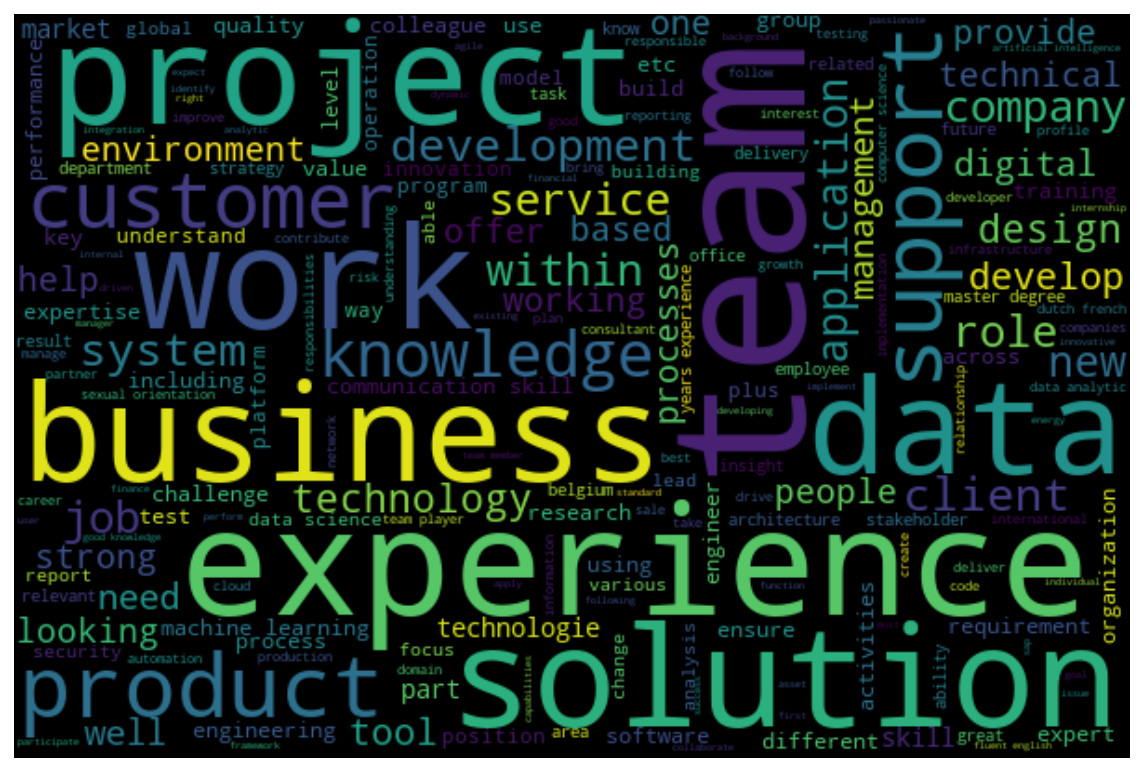

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

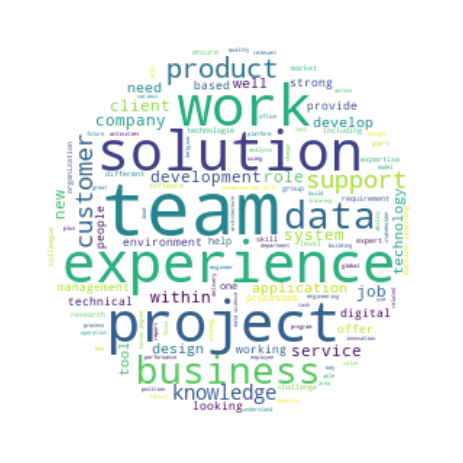

In [149]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words_lem)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear");

In [110]:
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words_lem)
fd = FreqDist(words)

fd.most_common(30)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lkakpo.BEIJAFLORE\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


[('data', 2187),
 ('work', 1766),
 ('team', 1682),
 ('experience', 1573),
 ('business', 1364),
 ('job', 1008),
 ('skills', 977),
 ('knowledge', 930),
 ('development', 852),
 ('solutions', 801),
 ('working', 771),
 ('new', 770),
 ('technology', 725),
 ('people', 637),
 ('environment', 632),
 ('world', 631),
 ('technical', 613),
 ('support', 602),
 ('clients', 601),
 ('company', 595),
 ('management', 590),
 ('part', 550),
 ('product', 502),
 ('offer', 499),
 ('project', 486),
 ('role', 482),
 ('projects', 481),
 ('services', 476),
 ('good', 468),
 ('help', 462)]

In [111]:
fd.tabulate(3)

data work team 
2187 1766 1682 


In [126]:
# Obtain top 100 words
top_20 = fd.most_common(20)

# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_20))

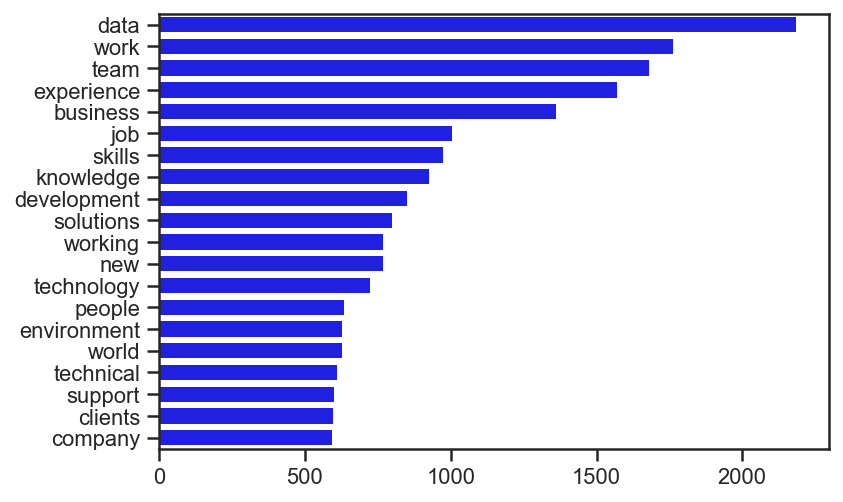

In [127]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [128]:
import plotly.express as px

fig = px.bar(y=fdist.index, x=fdist.values)

# sort values
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total ascending'})

# show plot
fig.show()

In [152]:
# Show frequency of a specific word
fd['act']

61

In [ ]:
(pd.Series(nltk.ngrams("text_lem", 2)).value_counts())[:10]